In [1]:
#Observation trends
#1 The data shows that the closer to 0 latitude, the hotter it is.
#2 It is humid in most places and there is no good correlation between being closer to the equator or further away. Also, cloudiness doesn’t not have a clear correlation.
#3 In my wind speed data is sporadic and winds seem to vary randomly.

In [2]:
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np

In [3]:
api_key = "8b517dd12acab8faa94bcceee89c48ac"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=8b517dd12acab8faa94bcceee89c48ac&units=imperial&q=


In [5]:
cities_df = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv")

In [6]:
selected_cities = cities_df.sample(n=500)
selected_cities.head()

,Country,City,Latitude,Longitude
26974,ph,alayao,14.281800,122.552400
11418,fr,bihorel,49.454685,1.122298
45525,us,cleveland,35.159444,-84.876667
13187,gh,kpandae,8.466667,-0.016667
46495,ws,saleilua,-14.016667,-171.700000


In [7]:
selected_cities["Temp"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""
selected_cities.head()

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
26974,ph,alayao,14.281800,122.552400,,,,
11418,fr,bihorel,49.454685,1.122298,,,,
45525,us,cleveland,35.159444,-84.876667,,,,
13187,gh,kpandae,8.466667,-0.016667,,,,
46495,ws,saleilua,-14.016667,-171.700000,,,,


In [8]:
weather_data = []
cities = selected_cities["City"]

In [9]:
city_list = []
for index, row in selected_cities.iterrows():
    
    try:
        weather = (req.get(query_url + row['City'].replace(" ","+")).json())
        selected_cities.set_value(index, "Temp", weather["main"]["temp"])
        selected_cities.set_value(index, "Humidity", weather["main"]["humidity"])
        selected_cities.set_value(index, "Cloudiness", weather["clouds"]["all"])
        selected_cities.set_value(index, "Wind Speed", weather["wind"]["speed"])
        print("--", end="")
        city_list.append(row['City'])
    except:
        print(row['City'])
selected_cities.head()

--------saleilua
----------------------mulatupo
------------------rogun
--------kastron
--------------kholmskaya
----------mau aima
----------ushtobe
----------------------waterfoot
----uwayl
--mangile
------solenzo
----budhgaon
------sioni
----------------------------------------signagi
----------------------------------------------------------frankfurt
------------------------------------------echt
------------------guaymitas
------------------------monospita
------------------------------------------------sedelnikovo
alzenau
----------------------------eucaliptus
--------new guinlo
--------san martin de hidalgo
----rohatyn
--------------aakirkeby
----------------------------------ayia varvara
--maguilling
----------------------------------------------kroderen
--------------------------------------------------------------agrafa
--punakha
----------------pulong sampalok
--------------------------------------------------------------------kerteh
-----------------------------------------

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
26974,ph,alayao,14.281800,122.552400,81.98,98,56,2.15
11418,fr,bihorel,49.454685,1.122298,40.17,86,75,9.17
45525,us,cleveland,35.159444,-84.876667,26.15,63,90,19.46
13187,gh,kpandae,8.466667,-0.016667,79.05,73,20,7.74
46495,ws,saleilua,-14.016667,-171.700000,,,,


In [10]:
print(selected_cities.shape)
selected_cities = selected_cities[selected_cities['City'].isin(city_list)]
print(selected_cities.shape)

(500, 8)
(459, 8)


In [11]:
selected_cities.to_csv('selected_cities.csv')

In [12]:
plt.scatter(selected_cities["Latitude"], selected_cities["Temp"], marker="o")

In [13]:
plt.title("Temperature (F) vs. Latitude (Today)")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

In [14]:
plt.savefig("Temperature_(F)_vs._Latitude_(Today).png")

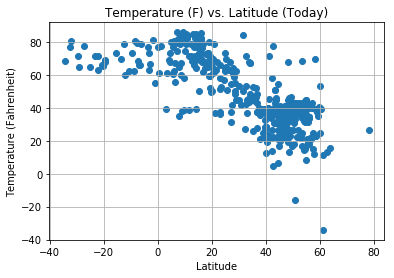

In [15]:
plt.show()

In [16]:
plt.scatter(selected_cities["Latitude"], selected_cities["Humidity"], marker="o")

In [17]:
plt.title("humidity % vs. Latitude (Today)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

In [18]:
plt.savefig("Humidity_%_vs._Latitude_(Today).png")

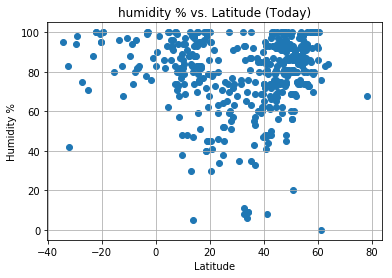

In [19]:
plt.show()

In [20]:
plt.scatter(selected_cities["Latitude"], selected_cities["Cloudiness"], marker="o")

In [21]:
plt.title("cloudiness % vs. Latitude (Today)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

In [22]:
plt.savefig("Cloudiness_%_vs._Latitude_(Today).png")

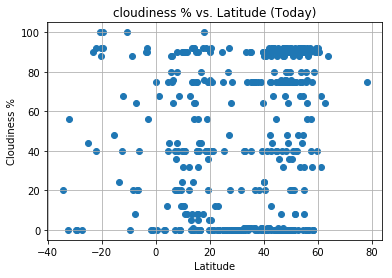

In [23]:
plt.show()

In [24]:
plt.scatter(selected_cities["Latitude"], selected_cities["Wind Speed"], marker="o")

In [25]:
plt.title("wind speed (mph) vs. Latitude (Today)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

In [26]:
plt.savefig("Wind_Speed_(mph)_vs._Latitude_(Today).png")

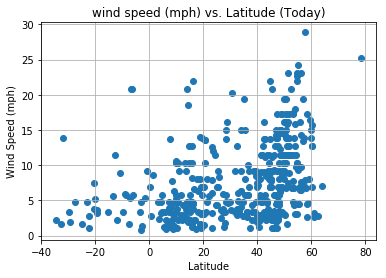

In [27]:
plt.show()